<a href="https://colab.research.google.com/github/Him99224/2023410641_CSL/blob/main/10_06_2025(Capstone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/bright_automotive_company.csv")

In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


1. As i can see in these there are some null values as well as misspelled genders there are few "?" in no_of_dependents field
2. there are few "?" in make as well

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,327
Femal,1
Femle,1


as there are very less errors we can remove them as well but i would like to keep as much of my data as i can so i will replace these with what i think is the correct pronouciation

In [ ]:
df['Gender'].replace({'Femal':'Female','Femle':'Female'},inplace=True)

/tmp/ipython-input-5-225572383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Femal':'Female','Femle':'Female'},inplace=True)


In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,6
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,13


Very few Null values compared to the size of our dataframe... so it's better to just remove them in this case

In [ ]:
df.shape

(1581, 14)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100.0,40400.0,119500,68000,SUV


In [ ]:
df['No_of_Dependents'].value_counts()

,count
No_of_Dependents,
2,506
3,484
1,203
4,197
0,14
?,2


In [ ]:
df.drop(df[df['No_of_Dependents']=='?'].index,inplace=True)

In [ ]:
df['Make'].value_counts()

,count
Make,
Sedan,615
Hatchback,534
SUV,255


***The data looks clean enough now***

<Axes: >

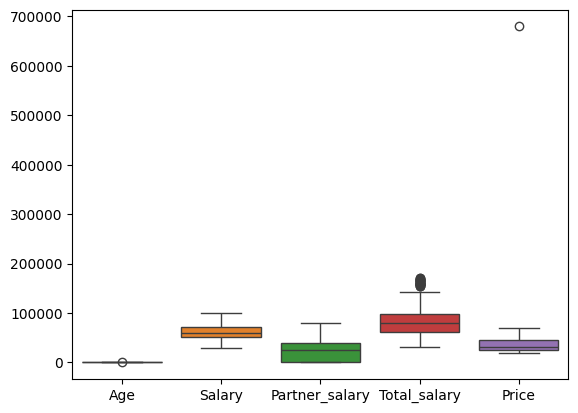

In [ ]:
sns.boxplot(df)

Some outliers are there

Shape before outlier removal: (1404, 14)
Shape after outlier removal: (1378, 14)


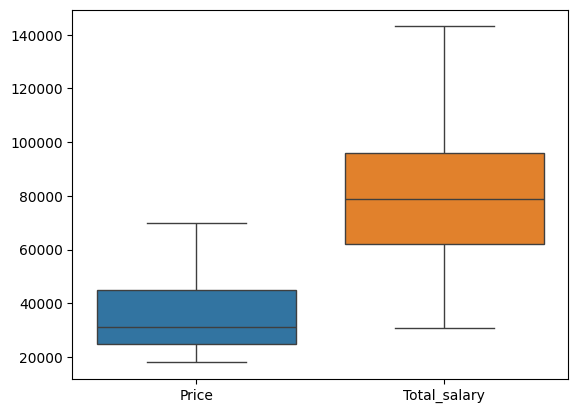

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers_iqr(df, 'Price')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Total_salary')

print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

sns.boxplot(df_cleaned[['Price', 'Total_salary']])
plt.show()

<Axes: >

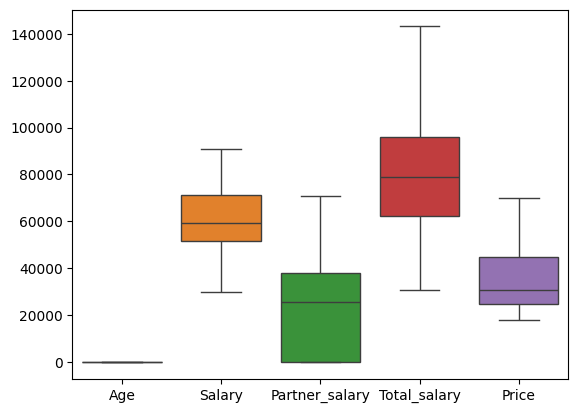

In [ ]:
sns.boxplot(df_cleaned)

After removing all outliers data is cleaned

and we can finally start analysing the data

In [ ]:
df=df_cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 7 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1378 non-null   int64  
 1   Gender            1378 non-null   object 
 2   Profession        1378 non-null   object 
 3   Marital_status    1378 non-null   object 
 4   Education         1378 non-null   object 
 5   No_of_Dependents  1378 non-null   object 
 6   Personal_loan     1378 non-null   object 
 7   House_loan        1378 non-null   object 
 8   Partner_working   1378 non-null   object 
 9   Salary            1378 non-null   float64
 10  Partner_salary    1378 non-null   float64
 11  Total_salary      1378 non-null   int64  
 12  Price             1378 non-null   int64  
 13  Make              1378 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 161.5+ KB


In [ ]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,31.430334,59754.934688,19762.844702,79517.779390,35202.467344
std,7.965330,14066.370105,18636.190451,23061.853528,12897.070640
min,14.000000,30000.000000,0.000000,30600.000000,18000.000000
25%,25.000000,51800.000000,0.000000,62125.000000,25000.000000
50%,29.000000,59200.000000,25700.000000,78850.000000,31000.000000
75%,37.000000,71175.000000,38200.000000,95900.000000,45000.000000
max,54.000000,90700.000000,70800.000000,143100.000000,70000.000000


As i can see in min the age is 14 which is not possible so i am gonna check these values and then proceed further

In [ ]:

df[df['Age'] < 20]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
414,14,Male,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,80600.0,40500.0,121100,43000,Sedan


this record is obviously incorrect as the age is 14 and all other data doesn't support the age

In [ ]:
df.drop(df[df['Age'] < 20].index,inplace=True)


In [ ]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,31.442992,59739.796659,19747.785040,79487.581699,35196.804648
std,7.954347,14060.247213,18634.571361,23042.961924,12900.042420
min,22.000000,30000.000000,0.000000,30600.000000,18000.000000
25%,25.000000,51800.000000,0.000000,62100.000000,25000.000000
50%,29.000000,59200.000000,25700.000000,78800.000000,31000.000000
75%,37.000000,71100.000000,38200.000000,95900.000000,45000.000000
max,54.000000,90700.000000,70800.000000,143100.000000,70000.000000


In [ ]:
df[df['Partner_salary']==0]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
13,50,Female,Salaried,Married,Post Graduate,3,No,No,No,77600.0,0.0,77600,50000,SUV
14,50,Female,Business,Married,Graduate,3,No,No,No,74100.0,0.0,74100,66000,SUV
15,49,Male,Salaried,Single,Post Graduate,2,No,No,No,87600.0,0.0,87600,52000,SUV
16,49,Male,Business,Married,Post Graduate,3,No,No,No,86800.0,0.0,86800,60000,SUV
27,46,Male,Salaried,Single,Post Graduate,2,No,No,No,88500.0,0.0,88500,60000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,22,Male,Salaried,Married,Graduate,3,Yes,Yes,No,34700.0,0.0,34700,20000,Sedan
1575,22,Male,Salaried,Married,Graduate,3,Yes,No,No,34000.0,0.0,34000,19000,Hatchback
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback


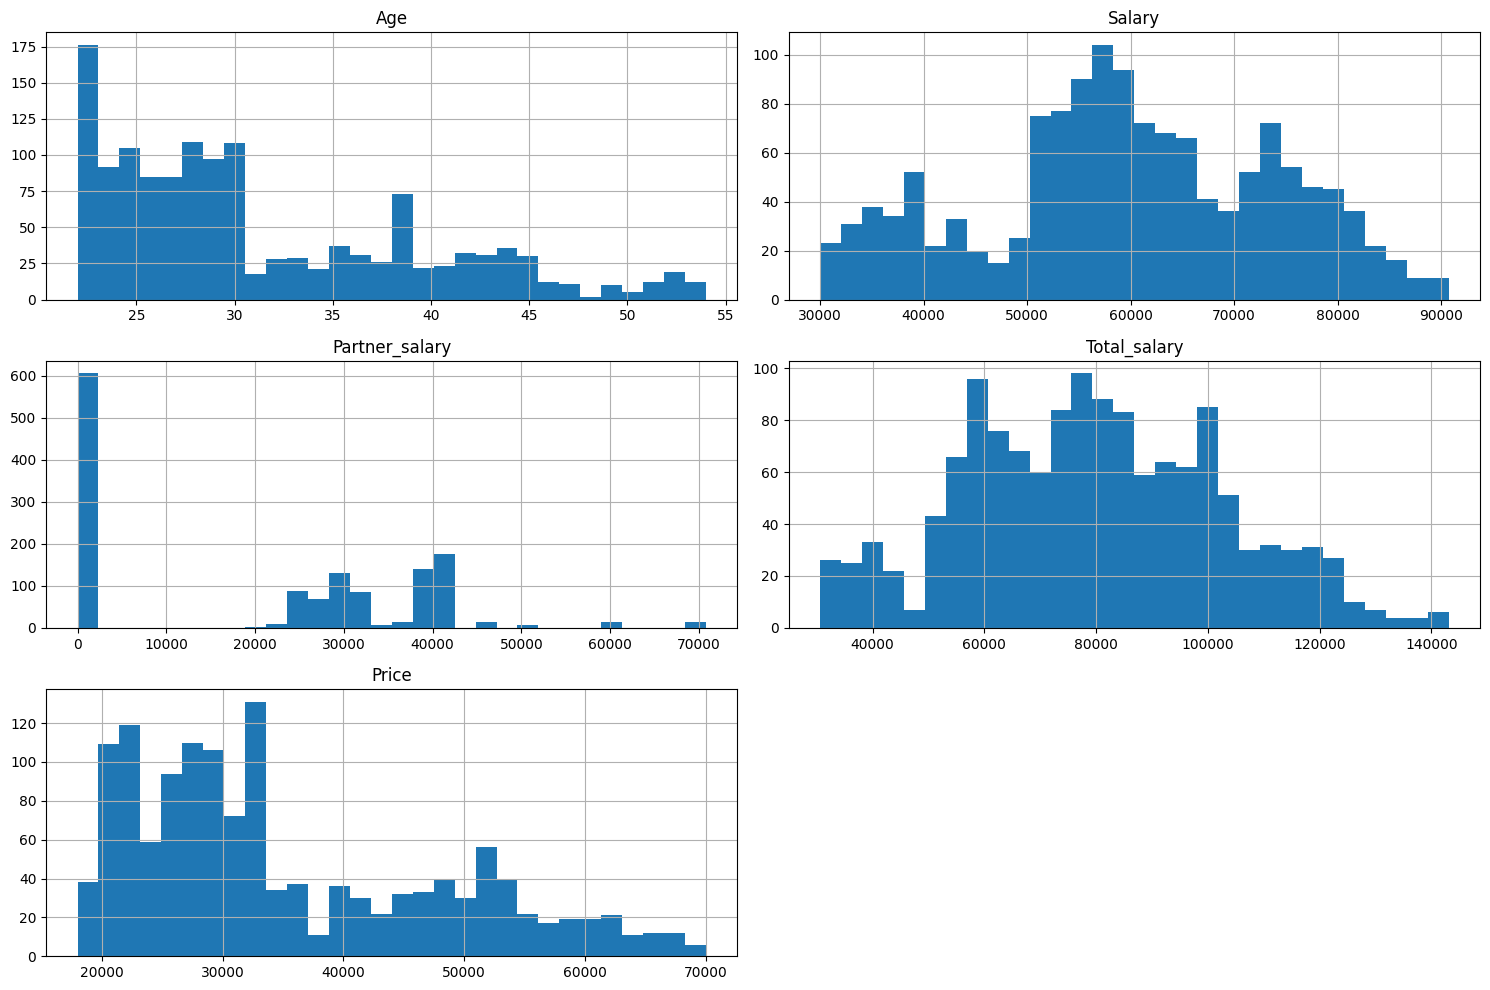

In [ ]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

The data seems right now

<Axes: xlabel='Salary', ylabel='Count'>

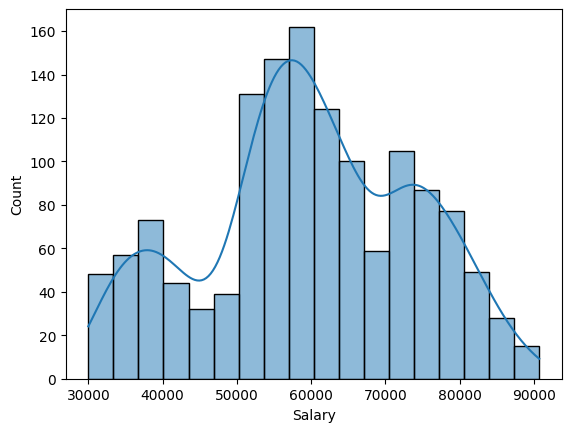

In [ ]:
sns.histplot(df['Salary'],kde=True)

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
string_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", numerical_cols)
print("String Columns:", string_cols)

Numerical Columns: Index(['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price'], dtype='object')
String Columns: Index(['Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Make'],
      dtype='object')


In [ ]:
corr=df[numerical_cols].corr()

<Axes: >

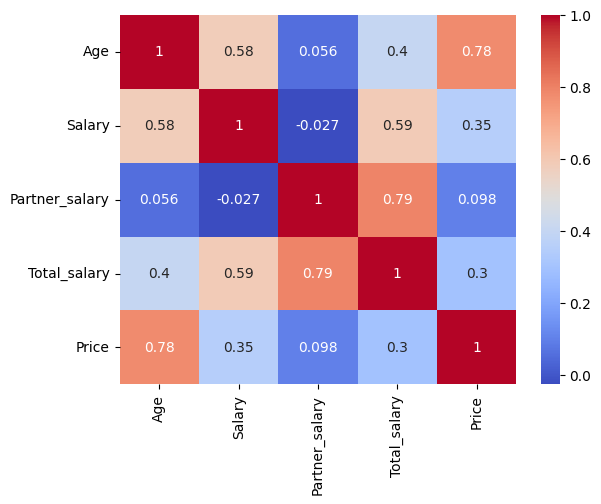

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

Gender
Male      1099
Female     278
Name: count, dtype: int64


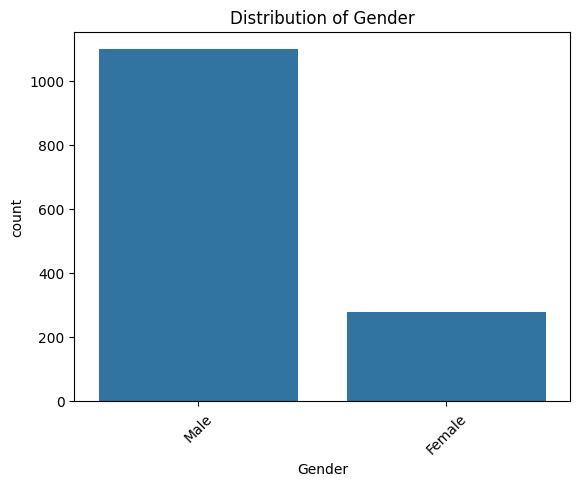

Profession
Salaried    762
Business    615
Name: count, dtype: int64


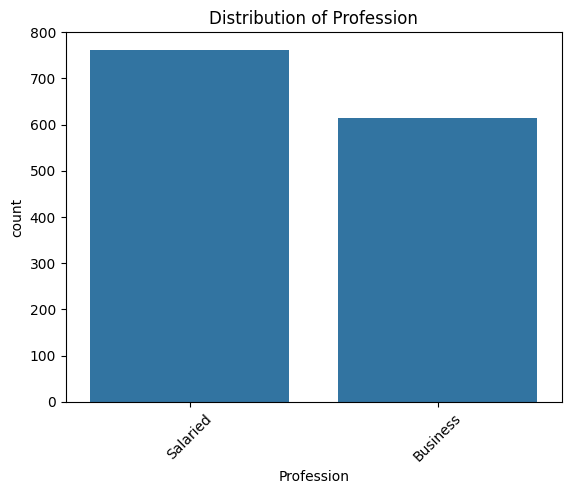

Marital_status
Married    1263
Single      114
Name: count, dtype: int64


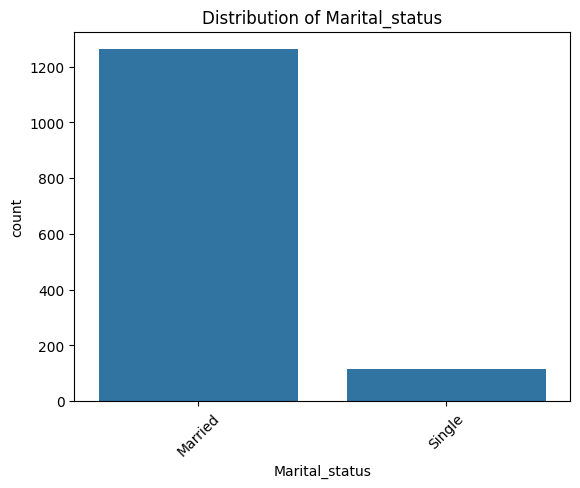

Education
Post Graduate    853
Graduate         524
Name: count, dtype: int64


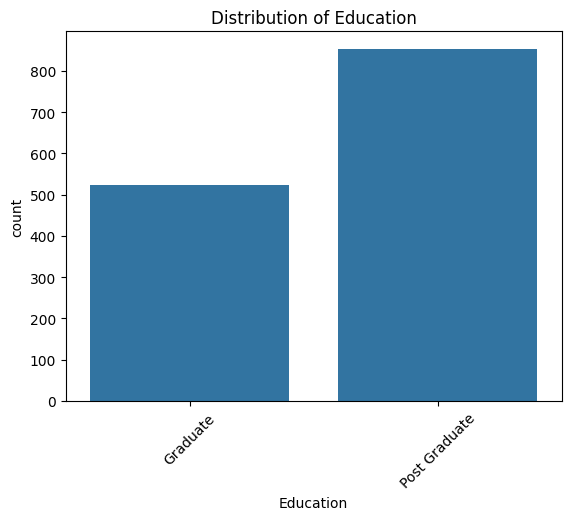

No_of_Dependents
2    499
3    473
1    203
4    188
0     14
Name: count, dtype: int64


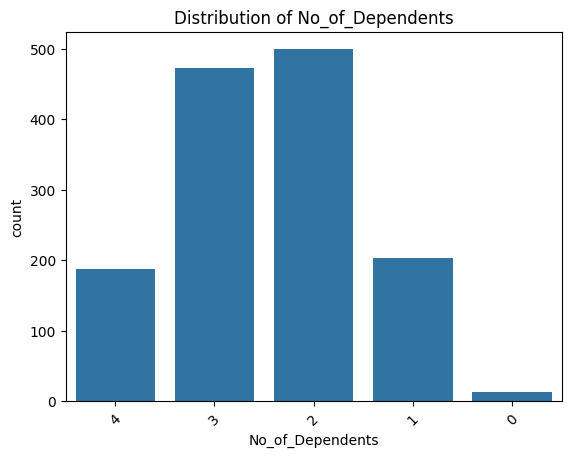

Personal_loan
Yes    698
No     679
Name: count, dtype: int64


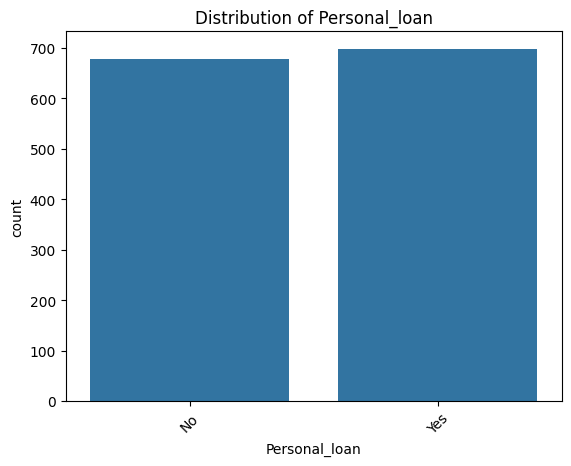

House_loan
No     899
Yes    478
Name: count, dtype: int64


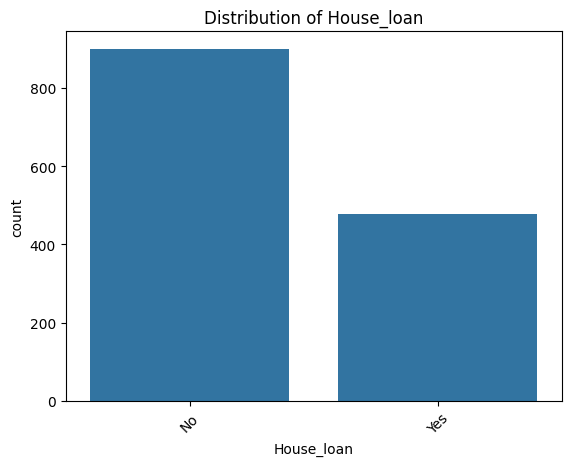

Partner_working
Yes    790
No     587
Name: count, dtype: int64


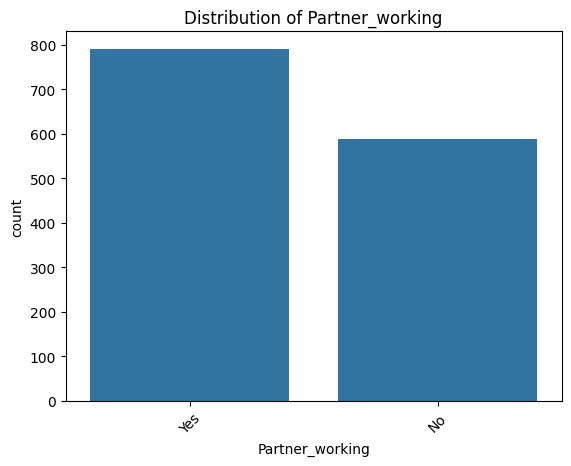

Make
Sedan        614
Hatchback    534
SUV          229
Name: count, dtype: int64


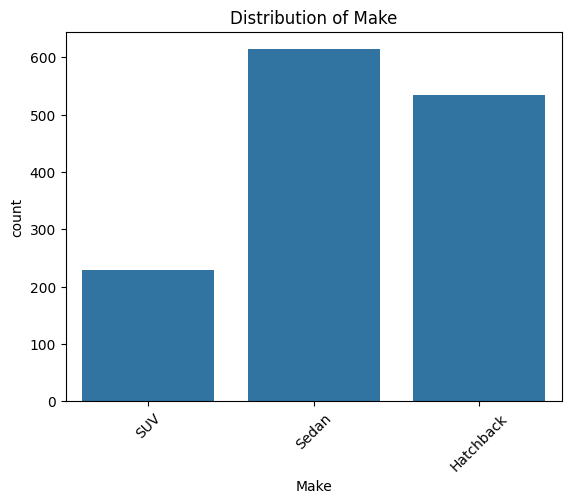

In [ ]:
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

We can figure a lot of things from this
1. mostly married individuals and have 2-3 number of dependents were buying cars so focusing on cars which were family friendly will be a good choice
2. working couples were more likely tp buy cars
3. and people who were post graduate were more likely to buy car
4. and mostly males were buying cars

In [ ]:
# 1. Average price by profession
df.groupby('Profession')['Price'].mean().sort_values(ascending=False)

,Price
Profession,
Salaried,36602.362205
Business,33455.284553


salaried ppl spend more on cars

In [ ]:
# 2. Car make preference by gender
df.groupby(['Gender', 'Make']).size().unstack().fillna(0)



Make,Hatchback,SUV,Sedan
Gender,,,
Female,13,137,128
Male,521,92,486


males prefer sedan and hatchback while females prefer sedans and SUV

In [ ]:
# 3. Average total salary vs partner working
df.groupby('Partner_working')['Total_salary'].mean()



,Total_salary
Partner_working,
No,60763.202726
Yes,93400.506329


In [ ]:
# 4. Average car price based on house loan status
df.groupby('House_loan')['Price'].mean()


,Price
House_loan,
No,37036.707453
Yes,31736.401674


Having house loan is affecting people choose their car but not so much

In [ ]:

# 5. Average age by car make
df.groupby('Make')['Age'].mean().sort_values()


,Age
Make,
Hatchback,25.741573
Sedan,32.154723
SUV,42.829694


older people are prefering SUVs while younger gen are prefering Hatchbacks